In [117]:
from tensorflow.keras.models import load_model

loaded_model = load_model("/Users/aroldogoulartbarros/workspace/faculdade/slime-ia/Treinos/com_imagens_maioresv2_95.h5")
test_data_dir = "/Users/aroldogoulartbarros/workspace/faculdade/slime-ia/Testes"

In [118]:
img_height = 700
img_width = 500
batch_size = 32

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()  # Rescale pixel values to [0, 1]

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),  # Adjust the target size to match your model's input size
    batch_size=batch_size,  # Batch size for generating predictions
    class_mode='categorical',  # Change this to 'binary' if you have a binary classification problem
    shuffle=False  # Set to False to maintain the order of images
)

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Calculate the number of images in the dataset
num_images = len(test_generator.filenames)

# Initialize empty lists to store images and true labels
all_images = []
all_true_labels = []

# Loop through the generator to accumulate all images and true labels
for i in range(num_images // batch_size):
    images, true_labels = next(test_generator)
    all_images.append(images)
    all_true_labels.append(true_labels)

# Concatenate the accumulated images and true labels
all_images = np.concatenate(all_images)
all_true_labels = np.concatenate(all_true_labels)

# Make predictions using the model on all images
predictions = loaded_model.predict(all_images)

# Now, you have predictions for all images in the test dataset
print("Total number of images:", len(all_images))
print(class_labels)


Found 751 images belonging to 4 classes.
23/23 [==============================] - 14s 581ms/step
Total number of images: 736
['manga', 'manhua', 'novels', 'webcomic']


python(21297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


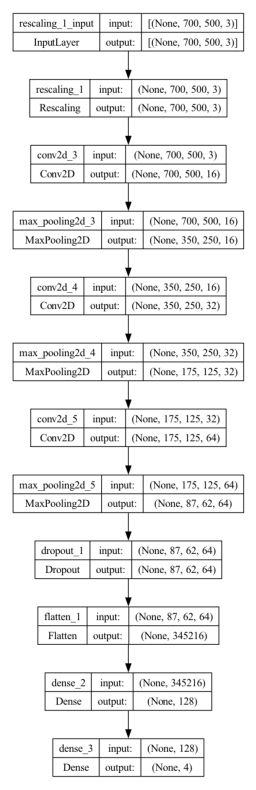

In [120]:
from tensorflow.keras.utils import plot_model

# Plot the architecture of the loaded model
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot using Matplotlib
from PIL import Image
img = Image.open('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [131]:

# Convert the predicted probabilities to class labels
print(predictions)
predicted_labels = [class_labels[np.argmax(pred)] for pred in predictions]

# Real label
labels_true = [class_labels[np.argmax(true)] for true in true_labels]


[[9.9954838e-01 4.4954222e-04 2.4731268e-08 1.9621821e-06]
 [9.5079094e-01 1.8242940e-02 2.1638379e-02 9.3277181e-03]
 [9.8966074e-01 3.2125274e-03 5.9009064e-03 1.2258888e-03]
 ...
 [8.2699090e-01 1.6226600e-01 1.9733711e-12 1.0743150e-02]
 [2.4535141e-03 9.8604244e-01 3.3652963e-05 1.1470359e-02]
 [1.2663551e-01 8.7334007e-01 1.2619059e-15 2.4318013e-05]]


In [132]:
import numpy as np

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(all_true_labels, axis=1)

# Calculate accuracy
accuracy = np.mean(np.equal(predicted_labels, true_labels))
accuracy_percentage = accuracy * 100

print("Accuracy:", accuracy_percentage, "%")


Accuracy: 88.04347826086956 %


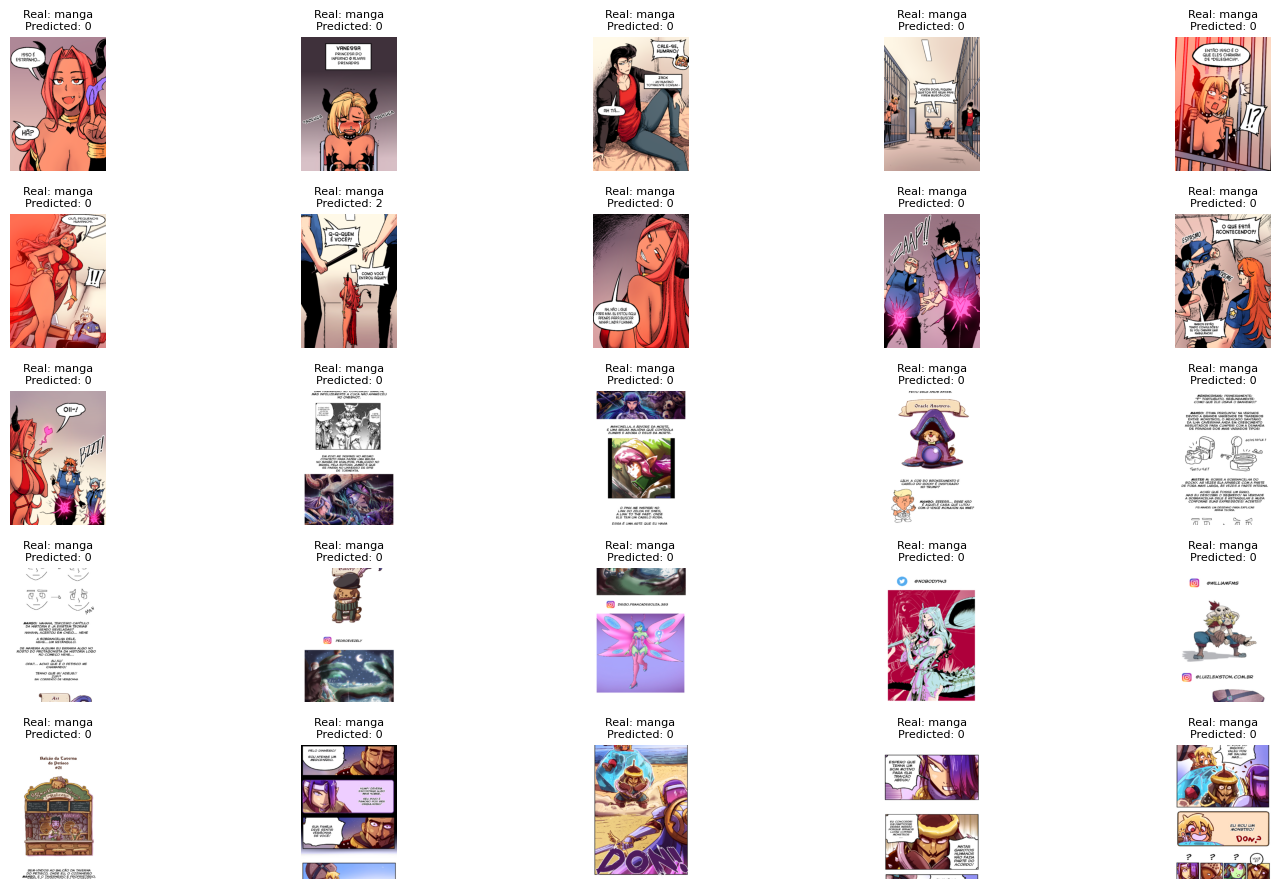

In [133]:

# Create a figure with multiple rows and columns to display images
num_rows = 5  # Number of rows of images to display
num_cols = 5  # Number of columns of images to display

# Create a figure to display the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 9))
for i in range(num_rows * num_cols):  # Display only 25 images
    ax = axes[i // num_cols, i % num_cols]
    if images[i].dtype == np.uint8:
        ax.imshow(images[i])
    else:
        ax.imshow(images[i] / 255.0)
    ax.set_title(f'Real: {labels_true[i]}\nPredicted: {predicted_labels[i]}', fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()